In [153]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import preprocessing #for normilization

In [176]:
#Import Files

path = '/Users/JosephVele/Documents/gradschool_year2/ds5500/wine-reviews'
filename = '/winemag-data_first150k.csv'
data = pd.read_csv(path+filename)


In [177]:
#Bin Points to see if clusters achieve good result
data['points_binned'] = pd.cut(data.points, bins=4)

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import TruncatedSVD

# PCA anlaysis
tf = TfidfVectorizer(max_features=1000, stop_words ='english', ngram_range=(1, 3))
data_desc = data.description.tolist()
X = tf.fit_transform(data_desc)

svd =  TruncatedSVD(n_components=2,random_state=24)
principalComponents = svd.fit_transform(X)
pca_df = pd.DataFrame(data = principalComponents,
                           columns = ['pc1', 'pc2'])


In [178]:
#Perform DBSCAN
from sklearn.cluster import DBSCAN
db_cluster = DBSCAN(eps=.005, min_samples=50).fit(pca_df)
y_db_pca = db_cluster.labels_
pca_df['points_binned']= data['points_binned'] 
pca_df['db_results']= y_db_pca
clusters = pca_df['db_results'].unique()
cat = data.points_binned.cat.categories
print(clusters)

[ 0 -1  1  2]


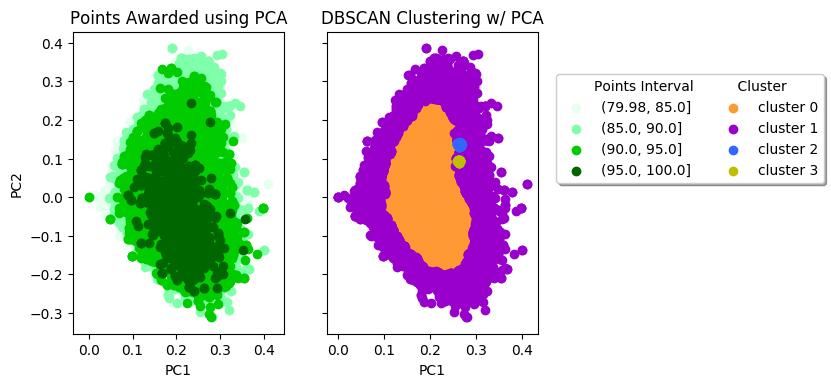

In [179]:
#Execute Scatter plot

#Color dictionary for pca
c = ['#e6ffee','#80ffaa', '#00cc00','#006600']

#color dictionary for clusters
c2 = ['#ff9933','#9900cc','#3366ff', 'y']
fig,(ax1, ax2) = plt.subplots(1,2, sharey=True)
fig.dpi=100
for i in range(len(cat)):
    ax1.scatter(pca_df[pca_df.points_binned == cat[i]]['pc1'], 
                pca_df[pca_df.points_binned == cat[i]]['pc2'],
               color = c[i], label= str(cat[i]))
    ax1.set_xlabel('PC1')
    ax1.set_ylabel('PC2')
    ax1.set_title('Points Awarded using PCA')
for i in range(len(clusters)):
    ax2.scatter(pca_df[pca_df.db_results == clusters[i]]['pc1'], 
                pca_df[pca_df.db_results == clusters[i]]['pc2'],
               color = c2[i], label= "cluster "+str(i))
                 

    
ax2.set_title('DBSCAN Clustering w/ PCA')    
ax2.set_xlabel('PC1')
    
fig.legend(loc='upper center', bbox_to_anchor=(1.15, 0.8), shadow=True, ncol=2,
          title = 'Points Interval          Cluster')
plt.show()


# Visualization 1

The above visualization encodes items using the point mark while two quantitative variables, principal components, utilize the spatial position and two categorical variables, points binned and cluster assignment, using the color channel (saturation for intervals and hue for cluster).  Per lecture 5, the channels being utilized are ranked high in the "channel ranking by data type". Regarding the color choices, saturation was chosen for the intervals to illustrate an ordinal relationship between the categories, while distinctly different hue colors were chosen as to emphasize discriminability. Next, the plots were placed side by side for juxtaposition. From a low task level, it allows for comparison and helps to decide whether the clusters can replace the desc feature.

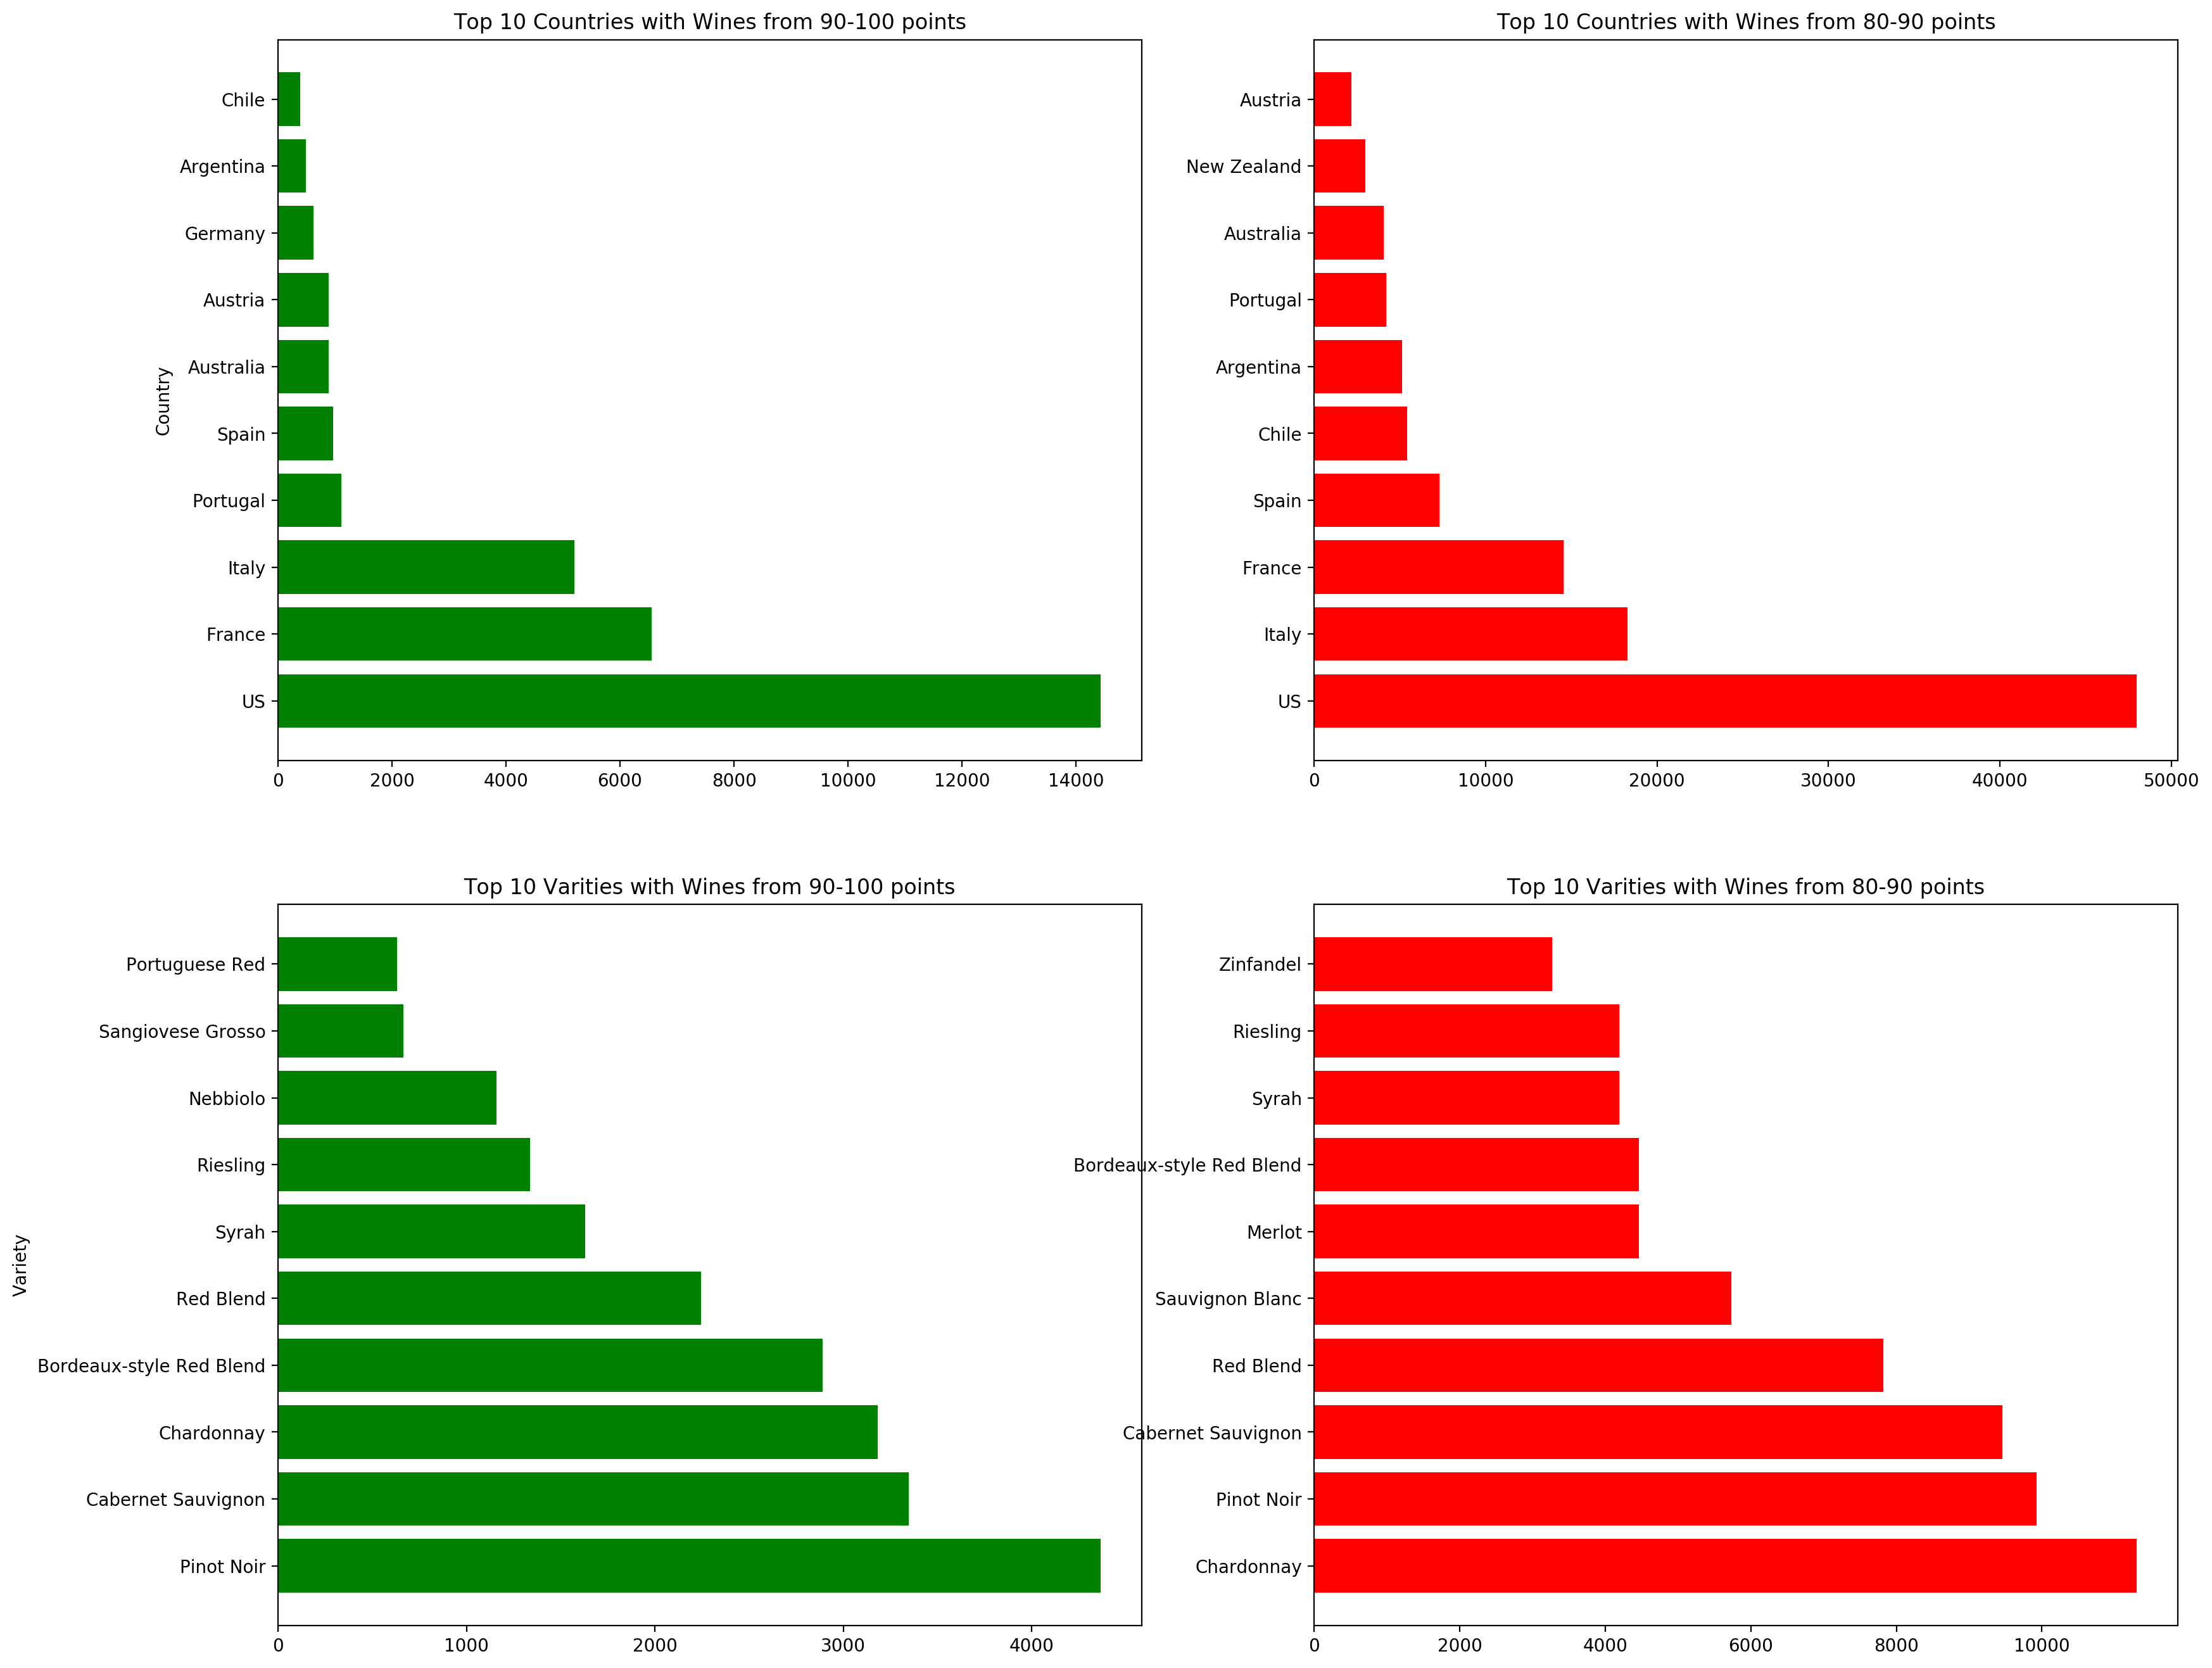

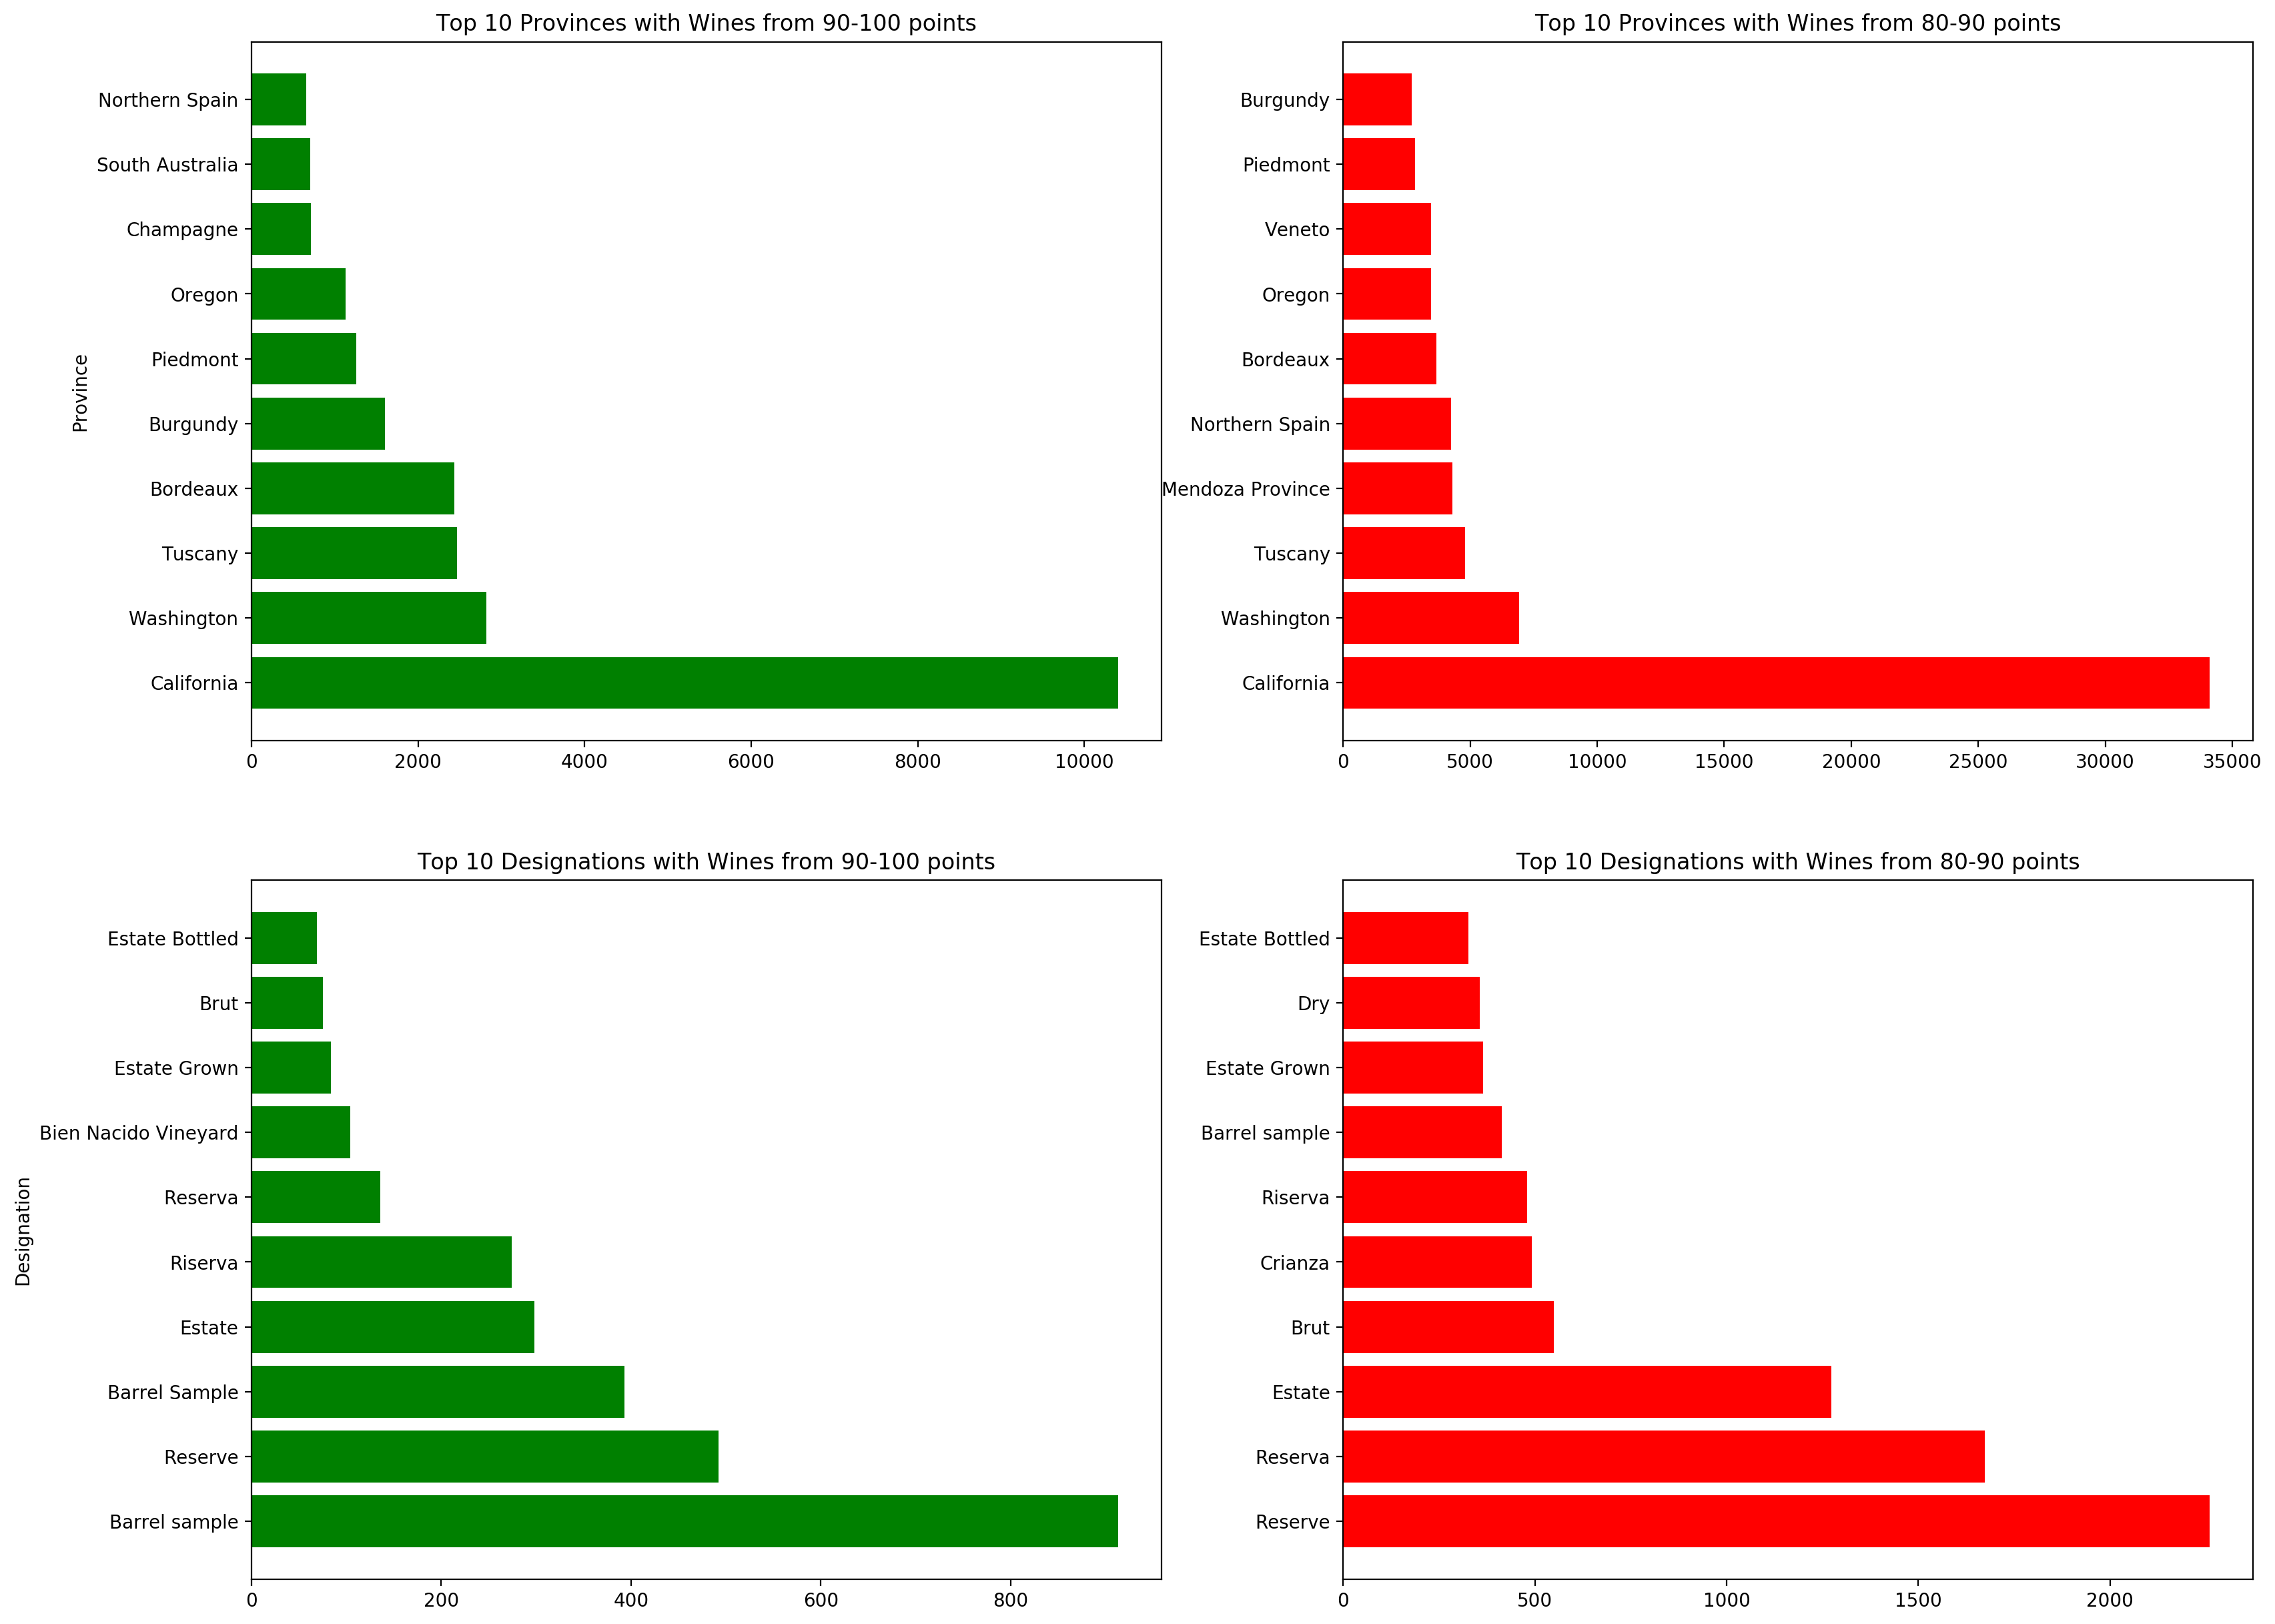

In [180]:
cat = data.points_binned.cat.categories 

fig,[(ax1,ax2),(ax3,ax4)] = plt.subplots(2,2)
fig.dpi = 200
data_filtered = data[data.points_binned.isin([cat[2],cat[3]])]
country_filt_top = data_filtered.groupby(['country'])['Unnamed: 0'].count().reset_index().sort_values(by=['Unnamed: 0'],ascending =False)
ax1.barh(country_filt_top['country'][:10],country_filt_top['Unnamed: 0'][:10], color='g')
ax1.set_ylabel('Country')
ax1.set_title('Top 10 Countries with Wines from 90-100 points')     
    

data_filtered = data[data.points_binned.isin([cat[0],cat[1]])]
country_filt_bottom = data_filtered.groupby(['country'])['Unnamed: 0'].count().reset_index().sort_values(by=['Unnamed: 0'],ascending =False)
ax2.barh(country_filt_bottom['country'][:10],country_filt_bottom['Unnamed: 0'][:10], color='r')
ax2.set_title('Top 10 Countries with Wines from 80-90 points')  


data_filtered = data[data.points_binned.isin([cat[2],cat[3]])]
variety_filt_top = data_filtered.groupby(['variety'])['Unnamed: 0'].count().reset_index().sort_values(by=['Unnamed: 0'],ascending =False)
ax3.barh(variety_filt_top['variety'][:10],variety_filt_top['Unnamed: 0'][:10], color='g')
ax3.set_ylabel('Variety')
ax3.set_title('Top 10 Varities with Wines from 90-100 points')     
    

data_filtered = data[data.points_binned.isin([cat[0],cat[1]])]
variety_filt_bottom = data_filtered.groupby(['variety'])['Unnamed: 0'].count().reset_index().sort_values(by=['Unnamed: 0'],ascending =False)
ax4.barh(variety_filt_bottom['variety'][:10],variety_filt_bottom['Unnamed: 0'][:10], color='r')
ax4.set_title('Top 10 Varities with Wines from 80-90 points') 


plt.subplots_adjust(left=-1, bottom=-2.25, right = 1.5 )

plt.show()

fig2,[(ax5,ax6),(ax7,ax8)] = plt.subplots(2,2)
fig2.dpi = 200
data_filtered = data[data.points_binned.isin([cat[2],cat[3]])]
prov_filt_top = data_filtered.groupby(['province'])['Unnamed: 0'].count().reset_index().sort_values(by=['Unnamed: 0'],ascending =False)
ax5.barh(prov_filt_top['province'][:10],prov_filt_top['Unnamed: 0'][:10], color='g')
ax5.set_ylabel('Province')
ax5.set_title('Top 10 Provinces with Wines from 90-100 points')     
    

data_filtered = data[data.points_binned.isin([cat[0],cat[1]])]
prov_filt_bottom = data_filtered.groupby(['province'])['Unnamed: 0'].count().reset_index().sort_values(by=['Unnamed: 0'],ascending =False)
ax6.barh(prov_filt_bottom['province'][:10],prov_filt_bottom['Unnamed: 0'][:10], color='r')
ax6.set_title('Top 10 Provinces with Wines from 80-90 points')  


data_filtered = data[data.points_binned.isin([cat[2],cat[3]])]
des_filt_top = data_filtered.groupby(['designation'])['Unnamed: 0'].count().reset_index().sort_values(by=['Unnamed: 0'],ascending =False)
ax7.barh(des_filt_top['designation'][:10],des_filt_top['Unnamed: 0'][:10], color='g')
ax7.set_ylabel('Designation')
ax7.set_title('Top 10 Designations with Wines from 90-100 points')     
    

data_filtered = data[data.points_binned.isin([cat[0],cat[1]])]
des_filt_bottom = data_filtered.groupby(['designation'])['Unnamed: 0'].count().reset_index().sort_values(by=['Unnamed: 0'],ascending =False)
ax8.barh(des_filt_bottom['designation'][:10],des_filt_bottom['Unnamed: 0'][:10], color='r')
ax8.set_title('Top 10 Designations with Wines from 80-90 points') 


plt.subplots_adjust(left=-1, bottom=-2, right =1.5)

plt.show()

                            

# Visualization 2

The purpose of the plot above is to juxtapose the important features for different points. I encoded the point intervals from 90-100 as green and the point intervals from 80-90 as red. The contrast effectively distinguishes both datasets. The length channel encodes the count which is a quantitative variables while the vertical spatial position encodes the top categories for each feature. Ideally, I was looking for a clear differentiation in features. That way we would only need to use some features for some categories and not all. However, in some cases like Country, the top 10 categories were nearly identical but encompassed a majority of the features.

# Preprocessing - Transform Categorical variables into dummy variables and standarize continuous variables

In [159]:
des_features = set(des_filt_top['designation'][:50].tolist() + des_filt_bottom['designation'][:50].tolist() )
country_features = set(country_filt_top['country'][:20].tolist() + country_filt_bottom['country'][:20].tolist())
variety_features = set(variety_filt_top['variety'][:20].tolist() + variety_filt_bottom['variety'][:20].tolist())
prov_features = set(prov_filt_top['province'][:20].tolist() + prov_filt_bottom['province'][:20].tolist())

#Apply same method to region 1 and winery 
data_filtered = data[data.points_binned.isin([cat[2],cat[3]])]
reg_filt_top = data_filtered.groupby(['region_1'])['Unnamed: 0'].count().reset_index().sort_values(by=['Unnamed: 0'],ascending =False)
data_filtered = data[data.points_binned.isin([cat[0],cat[1]])]
reg_filt_bottom = data_filtered.groupby(['region_1'])['Unnamed: 0'].count().reset_index().sort_values(by=['Unnamed: 0'],ascending =False)
reg_features = set(reg_filt_top['region_1'][:20].tolist() + reg_filt_bottom['region_1'][:20].tolist())
#half of the top 10 are shared with each other
print(len(set(reg_filt_top['region_1'][:20].tolist() + reg_filt_bottom['region_1'][:20].tolist())))


#These features are more evenly distributed so for this particular case we will retrive 50
data_filtered = data[data.points_binned.isin([cat[2],cat[3]])]
winery_filt_top = data_filtered.groupby(['winery'])['Unnamed: 0'].count().reset_index().sort_values(by=['Unnamed: 0'],ascending =False)
data_filtered = data[data.points_binned.isin([cat[0],cat[1]])]
winery_filt_bottom = data_filtered.groupby(['winery'])['Unnamed: 0'].count().reset_index().sort_values(by=['Unnamed: 0'],ascending =False)
winery_features = set(winery_filt_top['winery'][:50].tolist() + winery_filt_bottom['winery'][:50].tolist())

#This means the bottom features and top features are very different
print(len(set(winery_filt_top['winery'][:50].tolist() + winery_filt_bottom['winery'][:50].tolist())))


data.loc[~data.designation.isin(des_features),'designation'] ='other_desig'
data.loc[~data.country.isin(country_features),'country'] ='other_country'
data.loc[~data.variety.isin(variety_features),'variety'] ='other_variety'
data.loc[~data.province.isin(prov_features),'province'] ='other_province'
data.loc[~data.region_1.isin(reg_features),'region_1'] ='other_region1'
data.loc[~data.winery.isin(winery_features),'winery'] ='other_winery'

tf = TfidfVectorizer(max_features=1000, stop_words ='english', ngram_range=(1, 3))
data_desc = data.description.tolist()
X = tf.fit_transform(data_desc)

#Clusters aren't reliable and we lose detail so we stick to the principal components
svd =  TruncatedSVD(n_components=10,random_state=24)
principalComponents = svd.fit_transform(X)
pca_df = pd.DataFrame(data = principalComponents,
                           columns = ['pc1', 'pc2', 'pc3', 'pc4', 'pc5',
                                     'pc6', 'pc7', 'pc8', 'pc9', 'pc10'])



31
95


In [160]:
#Create function to create dummy variables
def dummies(df, col):
    new_df = pd.get_dummies(df[col])
    new_df = new_df.iloc[:,1:len(new_df.columns)]
    
    return new_df
#Apply to all categoical
countries = dummies(data, 'country') 
designation = dummies(data, 'designation')
province = dummies(data, 'province')
region1 = dummies(data, 'region_1')
region2 = dummies(data, 'region_2')
variety = dummies(data, 'variety')
winery = dummies(data, 'winery')
#desc = dummies(pca_df[['db_results']],'db_results')

terms = tf.get_feature_names()
# SVD Print Topics
for i, comp in enumerate(svd.components_):
    terms_comp = zip(terms, comp)
    sorted_terms = sorted(terms_comp, key= lambda x:x[1], reverse=True)[:7]
    print("Topic "+str(i)+": ")
    topics = []
    for t in sorted_terms:
        topics.append(t[0])
    print(topics)
        
#Create targets and input for model
frames = [countries, data[['price']], region1, province, designation, variety, winery, pca_df]
x_data = pd.concat(frames, axis=1).fillna(0)
y_data = data[['points']]

Topic 0: 
['wine', 'flavors', 'fruit', 'finish', 'acidity', 'aromas', 'tannins']
Topic 1: 
['apple', 'citrus', 'crisp', 'white', 'peach', 'fresh', 'lemon']
Topic 2: 
['wine', 'acidity', 'fruits', 'ripe', 'rich', 'wood', 'tannins']
Topic 3: 
['dry', 'pinot', 'flavors', 'sweet', 'cherries', 'oak', 'noir']
Topic 4: 
['red', 'cherry', 'pinot', 'berry', 'noir', 'pinot noir', 'raspberry']
Topic 5: 
['cabernet', 'sauvignon', 'blend', 'cabernet sauvignon', 'merlot', 'fresh', 'crisp']
Topic 6: 
['dry', 'green', 'apple', 'finish', 'palate', 'tannins', 'flavors']
Topic 7: 
['sweet', 'soft', 'red', 'berry', 'fruity', 'simple', 'cabernet']
Topic 8: 
['black', 'drink', 'black cherry', 'soft', 'blackberry', 'cherry', 'white']
Topic 9: 
['drink', 'ripe', 'red', 'soft', 'bodied', 'medium', 'pinot']


In [161]:
print(np.shape(x_data))

(150930, 291)


In [162]:
#Split data into training and testing data
from sklearn.model_selection import train_test_split 
X_train, X_test, Y_train, Y_test = train_test_split(x_data, y_data, test_size=0.20) 
min_price = min(X_test.loc[:,'price'])
max_price = max(X_train.loc[:,'price'])
             
X_test.loc[:,'price']  = (X_test.loc[:,'price'] - min_price)/ (max_price - min_price)
X_train.loc[:,'price'] = (X_train.loc[:,'price'] - min_price)/ (max_price - min_price)
Y_train = np.array(Y_train).ravel()
Y_test = np.array(Y_test).ravel()

/anaconda3/lib/python3.6/site-packages/pandas/core/indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


# Creating the Model and Justification

In [26]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import cross_val_score

ridge_accuracy = []
a = [1, .1,.01,.001]
sol = ['sag', 'saga', 'cholesky', 'svd' ]
for i in a:
    for j in sol:
        clf = Ridge(alpha=i, solver = j)
        scores = cross_val_score(clf, X_train.values, Y_train, cv=10, scoring='neg_mean_squared_error')
        ridge_accuracy.append([i, j, scores, np.mean(scores)]) # Append the r2 scores from Cross Validation       

## Linear Regression Justification
Linear Regression is the preliminary choice as it can be considered a good base model. In theory, if points is a linear function, the model should be able to map it appropriately; however, then we would need to validate that it fullfills the four assumptions of linear regression. 

In [32]:
from sklearn.neural_network import MLPRegressor
import random

nn_accuracy =[]
h = random.randint(25,100)
lr = random.uniform(.0001, .1)
m = random.uniform(.1, .9)
for i in range(10):
    h = random.randint(25,100)
    lr = random.uniform(.0001, .1)
    m = random.uniform(.5, .9)
    nn = MLPRegressor(hidden_layer_sizes=(h), activation='relu', 
                      solver='adam', batch_size=100, 
                      learning_rate='adaptive', learning_rate_init=lr,
                      random_state=1, momentum=m)
    scores = cross_val_score(nn, X_train.values, Y_train, cv=10, scoring='neg_mean_squared_error')
    
    nn_accuracy.append([h, lr, m, scores, np.mean(scores)]) # Append the r2 scores from Cross Validation
    

## Neural Network Justification

Assuming points is nonlinear and a complex function, trying a neural network seems like a good option. In theory, a neural network should be able to map any nonlinear function; however, that would require a large number of hidden layers. For the purpose of this excercise we only consider 1 hidden layer because of computation limitations. Also, its been proven for neural networks that random search is more efficient than grid search (Random Search for Hyper-Parameter Optimization by James Bergstra and
Yoshua Bengi)

In [37]:
from sklearn.ensemble import RandomForestRegressor

rf_accuracy = []
depth = [20,24, 28, 32,36,40]
n = [25,50]
for i in depth:
    for j in n:
        regr = RandomForestRegressor(max_depth=i, random_state=0, n_estimators=j, max_features = "sqrt")
        scores = cross_val_score(regr, X_train.values, Y_train, cv=10, scoring='neg_mean_squared_error')
        rf_accuracy.append([i, j, scores, np.mean(scores)]) # Append the r2 scores from Cross Validation

## Random Forest Justification
Given the large number of categorical features, it seems appropriate to consider Random Forest, especially considering the categorical features have a lot of different categories. Random forest will only deal with a few at a time so we don't need to worry about the curse of dimensionality so much. THe number of trees also deal with the bias issue.

In [39]:
ridge_scores = pd.DataFrame(ridge_accuracy, columns = ['Regularization', 'Solver','Negative_MSE', 'Mean_Negative_MSE'])
rf_scores =  pd.DataFrame(rf_accuracy, columns = ['Max_Depth', 'N_Trees','Negative_MSE', 'Mean_Negative_MSE'])

nn_scores = pd.DataFrame(nn_accuracy, columns = ['Hidden_Units', 'Learning_Rate','Momentum',
                                                 'Negative_MSE', 'Mean_Negative_MSE'])


## Metric Justification 
The best performance was found by analyzing which hyper parameters minimized the Mean Squared Error. For the purpose of a Regression problem, this is the metric that makes the most sense. We are trying to minimize our loss with respect to y_predict and y_true. And because we are also doing 10 fold cross validation, we are also able to see how its performance varies with different training and test sets. This prevents us from choosing a model that overfits. 

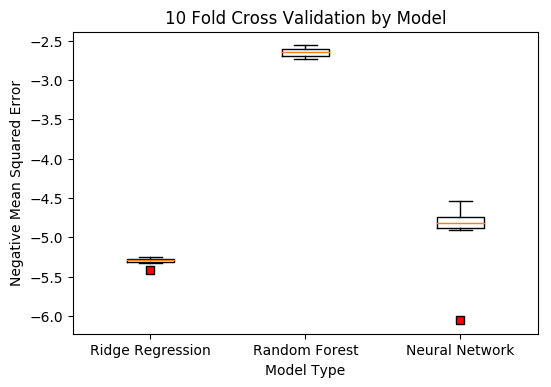

In [93]:
fig, (ax1) = plt.subplots(1, 1)
fig.dpi =100

X1 = ridge_scores[ridge_scores.Mean_Negative_MSE == max(ridge_scores.Mean_Negative_MSE)][['Negative_MSE']]
X2 = rf_scores[rf_scores.Mean_Negative_MSE == max(rf_scores.Mean_Negative_MSE)][['Negative_MSE']]
X3 = nn_scores[nn_scores.Mean_Negative_MSE == max(nn_scores.Mean_Negative_MSE)][['Negative_MSE']]
x=X1.append(X2,ignore_index=True).append(X3,ignore_index=True)

ax1.boxplot(x['Negative_MSE'], flierprops= dict(markerfacecolor='r', marker='s'))
ax1.set_title('10 Fold Cross Validation by Model')
ax1.set_xlabel('Model Type')
ax1.set_ylabel('Negative Mean Squared Error')   
plt.xticks([1,2,3],['Ridge Regression','Random Forest','Neural Network'])
plt.show()


# Visualization 3

The above boxplot depicts the results for the best three models with respect to their hyper parameters. When choosing models from cross validation, it is important not to just consider the mean but the distribution, as we do not want our final model to be unstable (large max and means). The task here is to review the summary statistics which is why we chose this depcition (VAD pg 309). I also encoded the outliers as red so that they can pop out and immediately let me know that there is some unstableness in the model. This is evident for the Neural Network and Ridge Regression. We can also observe that Random Forest has no outliers and that its performance is clearly better than the rest.

In [163]:
regr = RandomForestRegressor(max_depth=40, random_state=0, n_estimators=50, max_features = "sqrt")
regr.fit(X_train, Y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=40,
           max_features='sqrt', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=50, n_jobs=1,
           oob_score=False, random_state=0, verbose=0, warm_start=False)

# Performance on Test Data Set

In [164]:
from sklearn.metrics import mean_squared_error
y_pred = regr.predict(X_test)
print('Test Set: Mean Squared Error\t{:.2f}'.format(mean_squared_error(Y_test,y_pred)))

Test Set: Mean Squared Error	2.47


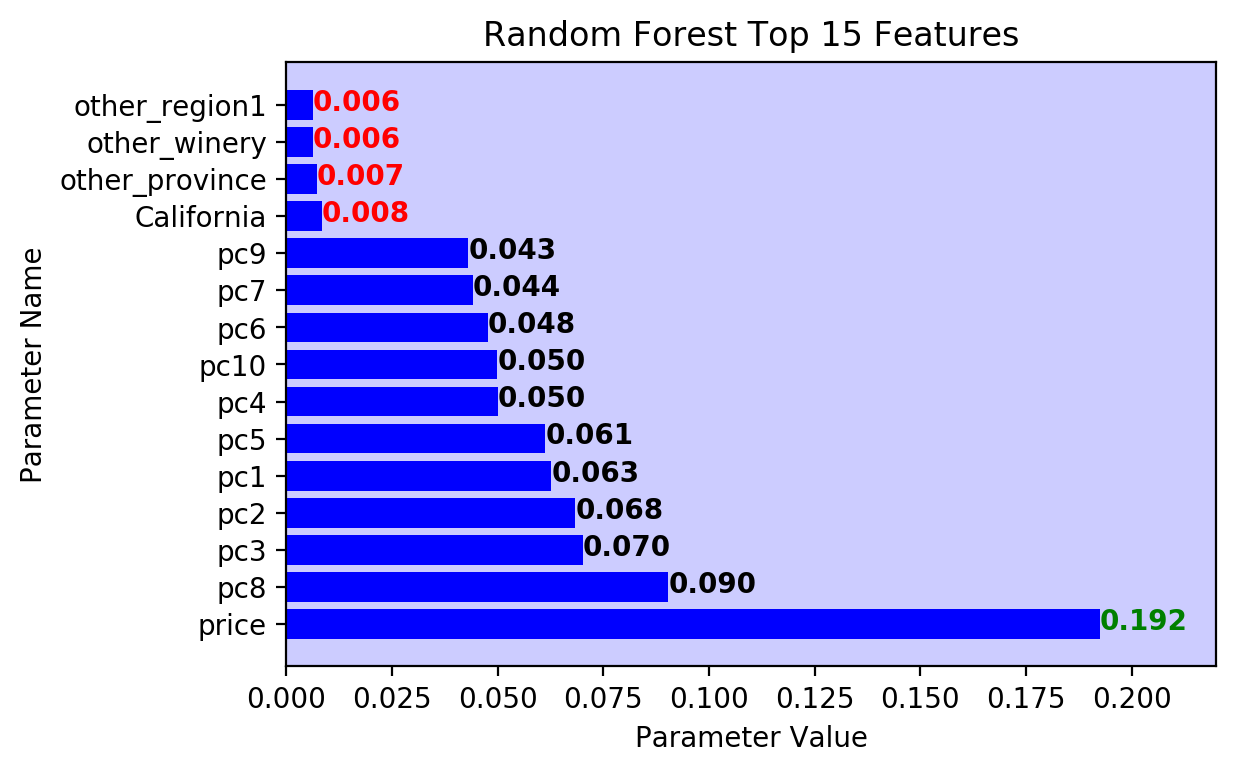

In [167]:
param_df = pd.DataFrame(list(X_train.columns.values), 
             columns=['Parameter_Name'])
param_df['Parameter_Importance']= regr.feature_importances_

param_df = param_df.sort_values(by=['Parameter_Importance'],ascending=False)[:15]

fig,ax1= plt.subplots(1,1)
fig.dpi = 200
ax1.barh(param_df.Parameter_Name, param_df.Parameter_Importance, color = 'b')
for i, v in enumerate(param_df['Parameter_Importance']):
    if v<.01:
        ax1.text(v, i-.15, "{:.3f}".format(v), color='r', fontweight='bold') 
    elif v <.1 :
        ax1.text(v, i-.15, "{:.3f}".format(v), color='black', fontweight='bold') 
    elif v >=.1 :
        ax1.text(v, i-.15, "{:.3f}".format(v), color='g', fontweight='bold')
        
ax1.set_xlim(left=0, right=.22)
ax1.set_facecolor('#ccccff')
ax1.set_ylabel('Parameter Name')
ax1.set_xlabel('Parameter Value')
ax1.set_title('Random Forest Top 15 Features')
plt.show()


# Visualization 4

The bar chart above clearly depcits the performance of the top features in the random forest model. The length channel shows how much importance a specific feature has with regards to the model. The features are clearly seen on the vertical axis. Also, we employ some form of semantic redundancy (in lecture 9 - slide 56), which helps users with recall. To go even further we use the color channel to signify which parameters are stronger and pop out immediately. Green and Red were used to juxtapose the difference in values. Finally, the graph has sorted bars to allow for comparison. 